<a href="https://colab.research.google.com/github/NatSama2/Bootcamp-Analisis-de-Datos/blob/main/Modulo-5/EDA_30_Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# EDA: Análisis Exploratorio de Datos - 30 Ejercicios Resueltos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset de ejemplo
data = {
    'Edad': [23, 45, 31, 35, 62, 28, 41, 37, 50, 29, np.nan, 44, 36, 33, 27],
    'Salario': [50000, 80000, 62000, 58000, 90000, 52000, 75000, 67000, 87000, 53000, 60000, 79000, 66000, 64000, 56000],
    'Genero': ['F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F'],
    'Departamento': ['Ventas', 'IT', 'Ventas', 'RRHH', 'IT', 'Ventas', 'IT', 'RRHH', 'IT', 'Ventas', 'RRHH', 'IT', 'RRHH', 'Ventas', 'IT'],
    'Antiguedad': [1, 10, 3, 5, 20, 2, 8, 7, 18, 2, 4, 11, 6, 3, 5]
}
df = pd.DataFrame(data)


In [2]:
print(df.head())  # Ejercicio 1: Vista general

   Edad  Salario Genero Departamento  Antiguedad
0  23.0    50000      F       Ventas           1
1  45.0    80000      M           IT          10
2  31.0    62000      F       Ventas           3
3  35.0    58000      M         RRHH           5
4  62.0    90000      F           IT          20


In [3]:
print(df.dtypes)  # Ejercicio 2: Tipos de datos

Edad            float64
Salario           int64
Genero           object
Departamento     object
Antiguedad        int64
dtype: object


In [4]:
print(df.describe())  # Ejercicio 3: Estadísticas básicas

            Edad       Salario  Antiguedad
count  14.000000     15.000000   15.000000
mean   37.214286  66600.000000    7.000000
std    10.452667  12816.284284    5.682052
min    23.000000  50000.000000    1.000000
25%    29.500000  57000.000000    3.000000
50%    35.500000  64000.000000    5.000000
75%    43.250000  77000.000000    9.000000
max    62.000000  90000.000000   20.000000


In [5]:
print(df.isnull().sum())  # Ejercicio 4: Detección de valores nulos

Edad            1
Salario         0
Genero          0
Departamento    0
Antiguedad      0
dtype: int64


In [6]:
print(df.dropna())  # Ejercicio 5: Eliminación de filas con nulos

    Edad  Salario Genero Departamento  Antiguedad
0   23.0    50000      F       Ventas           1
1   45.0    80000      M           IT          10
2   31.0    62000      F       Ventas           3
3   35.0    58000      M         RRHH           5
4   62.0    90000      F           IT          20
5   28.0    52000      M       Ventas           2
6   41.0    75000      M           IT           8
7   37.0    67000      F         RRHH           7
8   50.0    87000      M           IT          18
9   29.0    53000      F       Ventas           2
11  44.0    79000      M           IT          11
12  36.0    66000      F         RRHH           6
13  33.0    64000      M       Ventas           3
14  27.0    56000      F           IT           5


In [7]:
print(df.fillna(df['Edad'].mean()))  # Ejercicio 6: Rellenar nulos

         Edad  Salario Genero Departamento  Antiguedad
0   23.000000    50000      F       Ventas           1
1   45.000000    80000      M           IT          10
2   31.000000    62000      F       Ventas           3
3   35.000000    58000      M         RRHH           5
4   62.000000    90000      F           IT          20
5   28.000000    52000      M       Ventas           2
6   41.000000    75000      M           IT           8
7   37.000000    67000      F         RRHH           7
8   50.000000    87000      M           IT          18
9   29.000000    53000      F       Ventas           2
10  37.214286    60000      F         RRHH           4
11  44.000000    79000      M           IT          11
12  36.000000    66000      F         RRHH           6
13  33.000000    64000      M       Ventas           3
14  27.000000    56000      F           IT           5


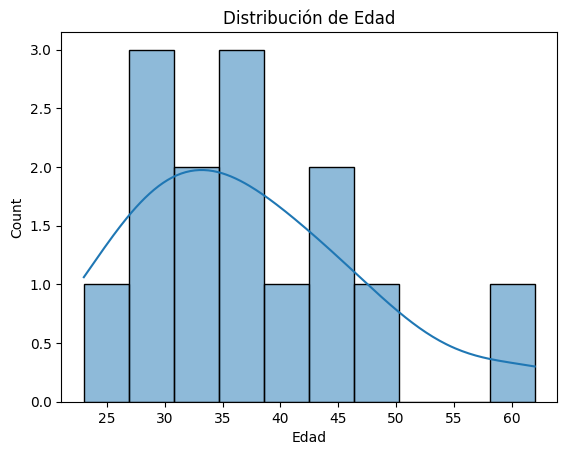

In [8]:
sns.histplot(df['Edad'], bins=10, kde=True); plt.title('Distribución de Edad'); plt.show()  # Ejercicio 7

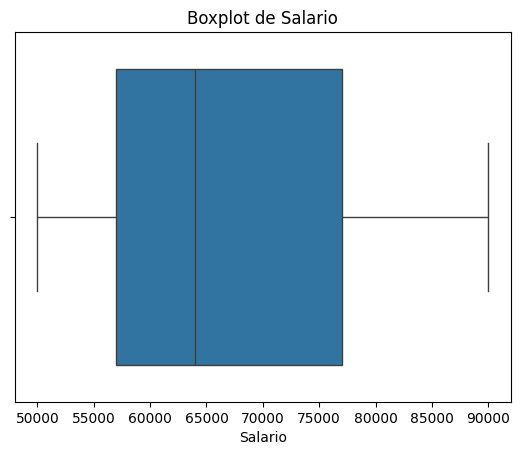

In [9]:
sns.boxplot(x=df['Salario']); plt.title('Boxplot de Salario'); plt.show()  # Ejercicio 8

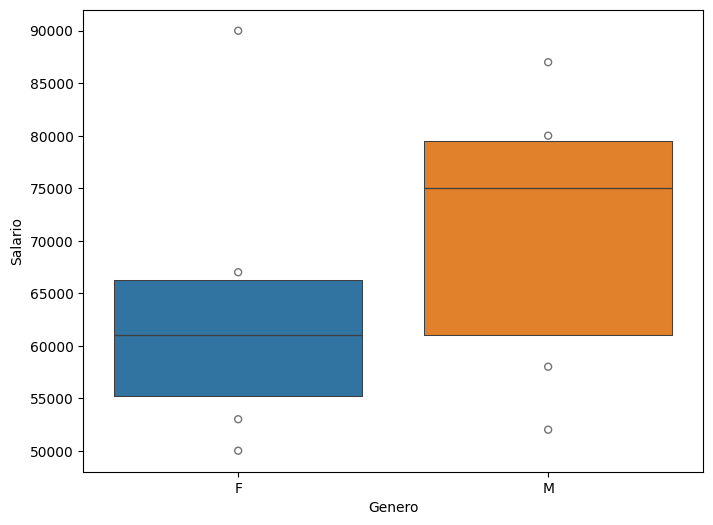

In [11]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data = df,x='Genero',y='Salario',hue='Genero')
plt.show()

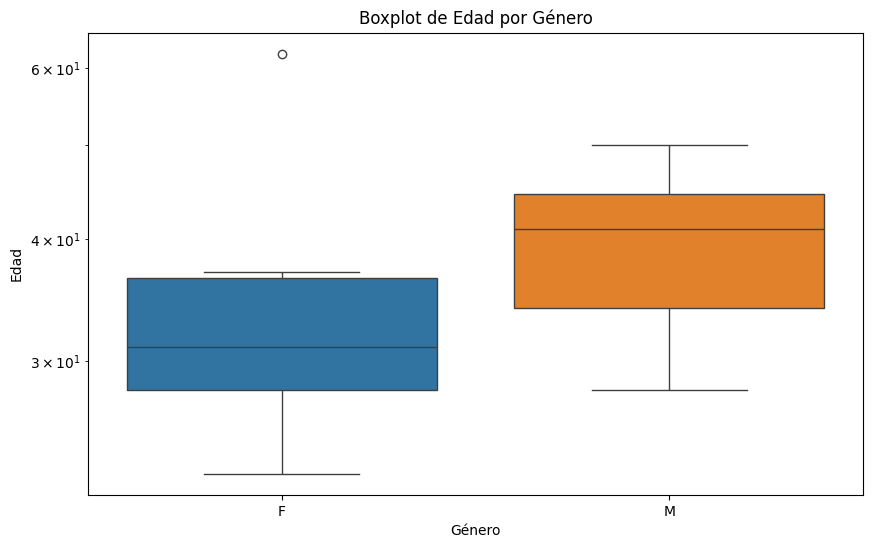

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df,x='Genero',y='Edad',hue='Genero')
plt.yscale('log')
plt.title('Boxplot de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

In [12]:
print(df['Genero'].value_counts())  # Ejercicio 9

Genero
F    8
M    7
Name: count, dtype: int64


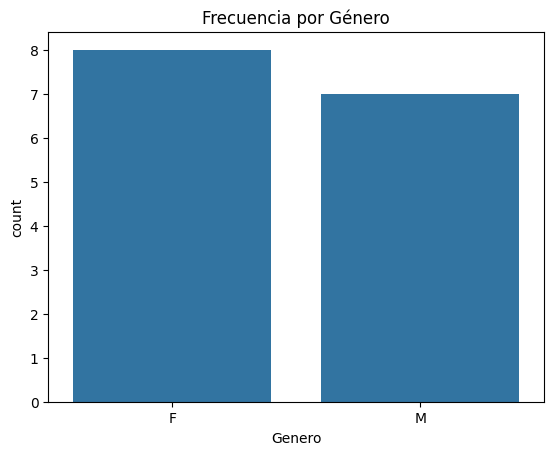

In [13]:
sns.countplot(x='Genero', data=df); plt.title('Frecuencia por Género'); plt.show()  # Ejercicio 10

In [14]:
print(df.groupby('Departamento')['Salario'].mean())  # Ejercicio 11

Departamento
IT        77833.333333
RRHH      62750.000000
Ventas    56200.000000
Name: Salario, dtype: float64


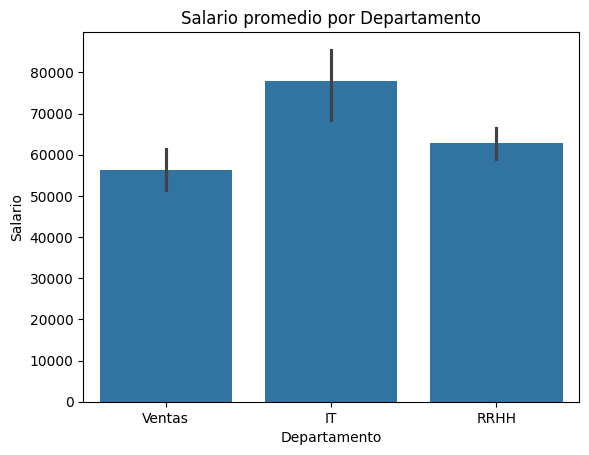

In [15]:
sns.barplot(x='Departamento', y='Salario', data=df, estimator=np.mean); plt.title('Salario promedio por Departamento'); plt.show()  # Ejercicio 12

In [16]:
print(df.corr(numeric_only=True))  # Ejercicio 13

                Edad   Salario  Antiguedad
Edad        1.000000  0.956364    0.955466
Salario     0.956364  1.000000    0.936716
Antiguedad  0.955466  0.936716    1.000000


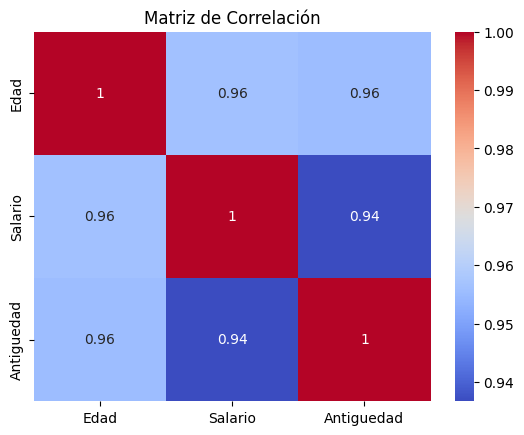

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm'); plt.title('Matriz de Correlación'); plt.show()  # Ejercicio 14

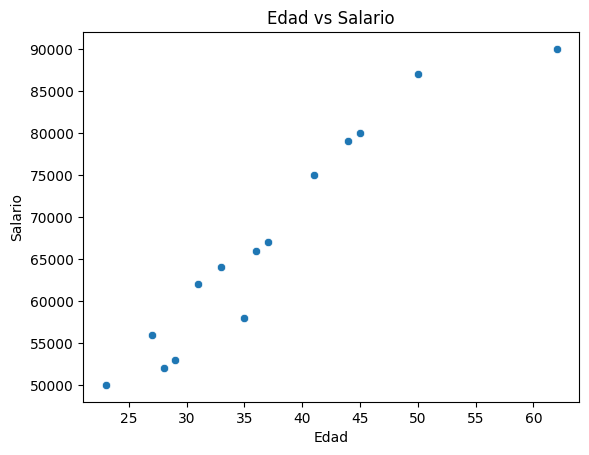

In [18]:
sns.scatterplot(x='Edad', y='Salario', data=df); plt.title('Edad vs Salario'); plt.show()  # Ejercicio 15

In [19]:
from scipy.stats import zscore
z_scores = zscore(df[['Edad', 'Salario']].dropna())
outliers = (np.abs(z_scores) > 2)
print(outliers)  # Ejercicio 16

[[False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]


In [20]:
z_scores

array([[-1.41120556, -1.34573693],
       [ 0.77297189,  1.01915642],
       [-0.61695921, -0.39977959],
       [-0.21983604, -0.71509871],
       [ 2.46074537,  1.80745421],
       [-0.91480159, -1.18807738],
       [ 0.37584872,  0.62500753],
       [-0.02127446, -0.0056307 ],
       [ 1.26937586,  1.57096487],
       [-0.8155208 , -1.1092476 ],
       [ 0.6736911 ,  0.94032664],
       [-0.12055525, -0.08446048],
       [-0.41839763, -0.24212003],
       [-1.01408239, -0.87275826]])

In [23]:
df['Edad'] = df['Edad'].fillna(df['Edad'].mean())  # Ejercicio 6: Rellenar nulos
df

,Edad,Salario,Genero,Departamento,Antiguedad,zcore Edad,zcore Salario
0,23.000000,50000,F,Ventas,1,NaN,-1.340688
1,45.000000,80000,M,IT,10,NaN,1.082242
2,31.000000,62000,F,Ventas,3,NaN,-0.371516
3,35.000000,58000,M,RRHH,5,NaN,-0.694573
4,62.000000,90000,F,IT,20,NaN,1.889885
5,28.000000,52000,M,Ventas,2,NaN,-1.179159
6,41.000000,75000,M,IT,8,NaN,0.678420
7,37.000000,67000,F,RRHH,7,NaN,0.032306
8,50.000000,87000,M,IT,18,NaN,1.647592
9,29.000000,53000,F,Ventas,2,NaN,-1.098395


In [24]:
from os import stat
from scipy.stats import zscore
df['zcore Edad'] = zscore(df['Edad'])
df['zcore Salario'] = zscore(df['Salario'])
df

,Edad,Salario,Genero,Departamento,Antiguedad,zcore Edad,zcore Salario
0,23.000000,50000,F,Ventas,1,-1.460737,-1.340688
1,45.000000,80000,M,IT,10,0.800102,1.082242
2,31.000000,62000,F,Ventas,3,-0.638613,-0.371516
3,35.000000,58000,M,RRHH,5,-0.227552,-0.694573
4,62.000000,90000,F,IT,20,2.547113,1.889885
5,28.000000,52000,M,Ventas,2,-0.946910,-1.179159
6,41.000000,75000,M,IT,8,0.389040,0.678420
7,37.000000,67000,F,RRHH,7,-0.022021,0.032306
8,50.000000,87000,M,IT,18,1.313929,1.647592
9,29.000000,53000,F,Ventas,2,-0.844144,-1.098395


In [25]:
q1 = df['Edad'].quantile(0.25)
q3 = df['Edad'].quantile(0.75)
Dif_iqr = q3 - q1
print(Dif_iqr)

12.5


In [28]:
valores_atipicos = df[(df['Edad'] < q1 - 1.5 * Dif_iqr) | (df['Edad'] > q3 + 1.5 * Dif_iqr)]
valores_atipicos

,Edad,Salario,Genero,Departamento,Antiguedad,zcore Edad,zcore Salario
4,62.0,90000,F,IT,20,2.547113,1.889885


In [33]:
q1_s = df['Salario'].quantile(0.25)
q3_s = df['Salario'].quantile(0.75)
Dif_iqr_salario = q3_s - q1_s
valores_atipicos_salario = df[(df['Salario'] < q1_s - 1.5 * Dif_iqr_salario) | (df['Salario'] > q3_s + 1.5 * Dif_iqr_salario)]
valores_atipicos_salario

,Edad,Salario,Genero,Departamento,Antiguedad,zcore Edad,zcore Salario


In [31]:
print(df['Edad'].value_counts().sort_index())  # Ejercicio 17

Edad
23.000000    1
27.000000    1
28.000000    1
29.000000    1
31.000000    1
33.000000    1
35.000000    1
36.000000    1
37.000000    1
37.214286    1
41.000000    1
44.000000    1
45.000000    1
50.000000    1
62.000000    1
Name: count, dtype: int64


In [34]:
df['Rango_Edad'] = pd.cut(df['Edad'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30','30-40','40-50','50-60','60-70'])
print(df[['Edad', 'Rango_Edad']])  # Ejercicio 18

         Edad Rango_Edad
0   23.000000      20-30
1   45.000000      40-50
2   31.000000      30-40
3   35.000000      30-40
4   62.000000      60-70
5   28.000000      20-30
6   41.000000      40-50
7   37.000000      30-40
8   50.000000      40-50
9   29.000000      20-30
10  37.214286      30-40
11  44.000000      40-50
12  36.000000      30-40
13  33.000000      30-40
14  27.000000      20-30


In [35]:
print(pd.crosstab(df['Genero'], df['Departamento']))  # Ejercicio 19

Departamento  IT  RRHH  Ventas
Genero                        
F              2     3       3
M              4     1       2


In [36]:
print(df.pivot_table(values='Salario', index='Genero', columns='Departamento'))  # Ejercicio 20

Departamento       IT          RRHH   Ventas
Genero                                      
F             73000.0  64333.333333  55000.0
M             80250.0  58000.000000  58000.0


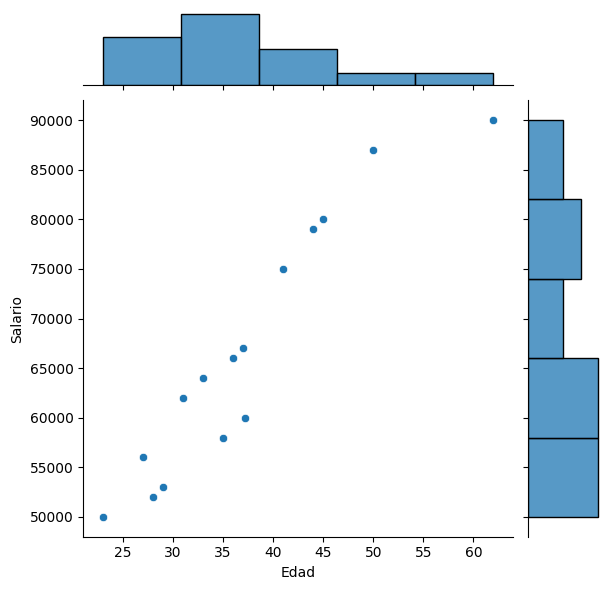

In [37]:
sns.jointplot(x='Edad', y='Salario', data=df)  # Ejercicio 21

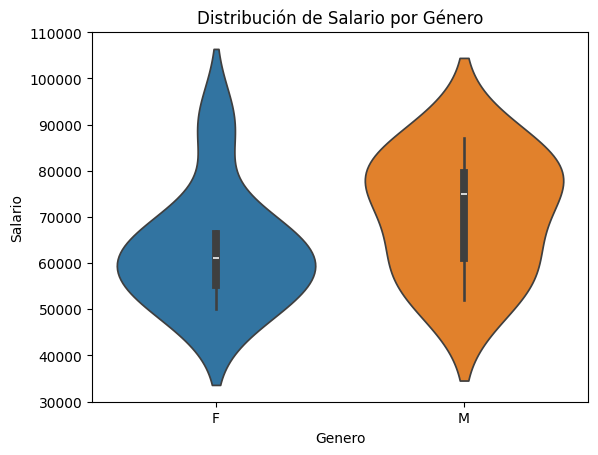

In [39]:
sns.violinplot(x='Genero', y='Salario', data=df, hue='Genero'); plt.title('Distribución de Salario por Género'); plt.show()  # Ejercicio 22

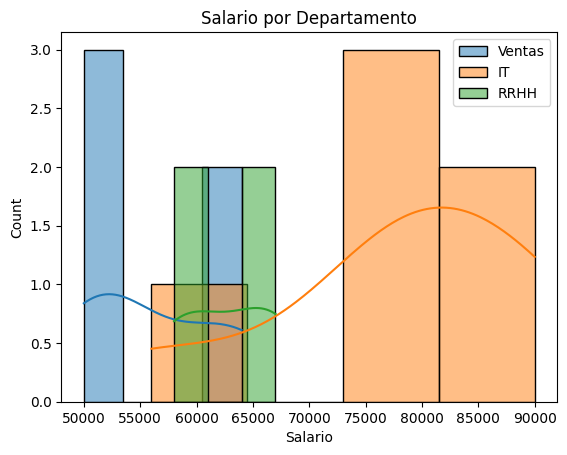

In [40]:
for dep in df['Departamento'].unique():
    sns.histplot(df[df['Departamento'] == dep]['Salario'], label=dep, kde=True)
plt.legend(); plt.title('Salario por Departamento'); plt.show()  # Ejercicio 23

In [41]:
print(df.groupby(['Genero', 'Departamento']).size())  # Ejercicio 24

Genero  Departamento
F       IT              2
        RRHH            3
        Ventas          3
M       IT              4
        RRHH            1
        Ventas          2
dtype: int64


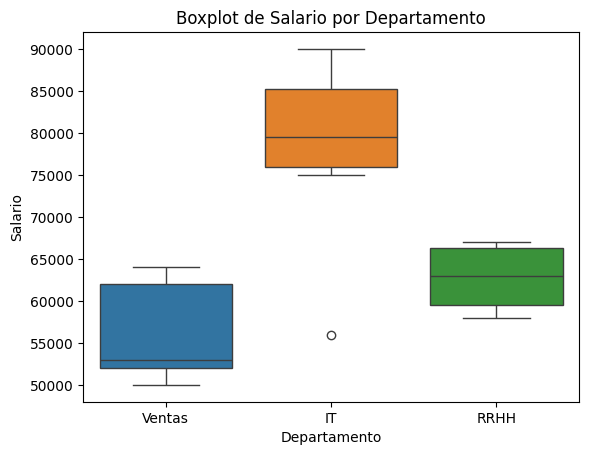

In [43]:
sns.boxplot(x='Departamento', y='Salario', data=df, hue='Departamento'); plt.title('Boxplot de Salario por Departamento'); plt.show()  # Ejercicio 25

In [44]:
print(df.groupby('Genero')['Edad'].mean())  # Ejercicio 26

Genero
F    35.276786
M    39.428571
Name: Edad, dtype: float64


In [45]:
print(df.groupby('Rango_Edad')['Salario'].sum())  # Ejercicio 27

Rango_Edad
20-30    211000
30-40    377000
40-50    321000
50-60         0
60-70     90000
Name: Salario, dtype: int64


/tmp/ipython-input-45-2323211010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Rango_Edad')['Salario'].sum())  # Ejercicio 27


In [46]:
def rango_salario(sal):
    if sal < 60000:
        return 'Bajo'
    elif sal <= 75000:
        return 'Medio'
    else:
        return 'Alto'
df['Categoria_Salario'] = df['Salario'].apply(rango_salario)
print(df[['Salario', 'Categoria_Salario']])  # Ejercicio 28

    Salario Categoria_Salario
0     50000              Bajo
1     80000              Alto
2     62000             Medio
3     58000              Bajo
4     90000              Alto
5     52000              Bajo
6     75000             Medio
7     67000             Medio
8     87000              Alto
9     53000              Bajo
10    60000             Medio
11    79000              Alto
12    66000             Medio
13    64000             Medio
14    56000              Bajo


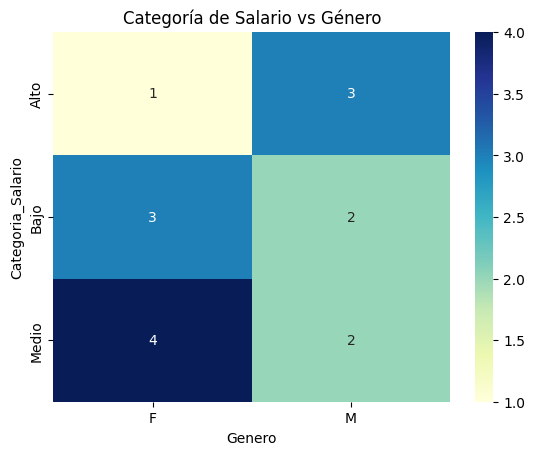

In [47]:
tabla = pd.crosstab(df['Categoria_Salario'], df['Genero'])
sns.heatmap(tabla, annot=True, cmap='YlGnBu'); plt.title('Categoría de Salario vs Género'); plt.show()  # Ejercicio 29

In [48]:
df_clean = df.dropna()
df_clean.to_csv('datos_limpios.csv', index=False)
print("Archivo exportado con éxito.")  # Ejercicio 30

Archivo exportado con éxito.
